In [ ]:
# Importing required libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import seed

In [ ]:
df = pd.read_csv('A2_Q1-data.csv')
# df.head()
df.shape

(43824, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [ ]:
df.describe()

In [ ]:
stringData =  df.select_dtypes(include=[np.object]).columns
print(stringData)

Index(['cbwd'], dtype='object')


In [ ]:
# null values
# check the missing points
missing = df.isnull().sum().sort_values(ascending = False)
percentageMissing = (missing/len(df))*100
pd.concat([missing, percentageMissing], axis = 1, keys= ['Number of missing values ', 'Percentage of Missing Values'])

,Number of missing values,Percentage of Missing Values
pm2.5,2067,4.716594
Ir,0,0.000000
Is,0,0.000000
Iws,0,0.000000
cbwd,0,0.000000
PRES,0,0.000000
TEMP,0,0.000000
DEWP,0,0.000000
hour,0,0.000000
day,0,0.000000


In [ ]:
for col in df.columns:
    print("The column: ", col)
    print(df[col].unique()) 
    print()


In [ ]:
df.hist(figsize=(20,10), grid = True, layout=(4, 4), bins = 30)

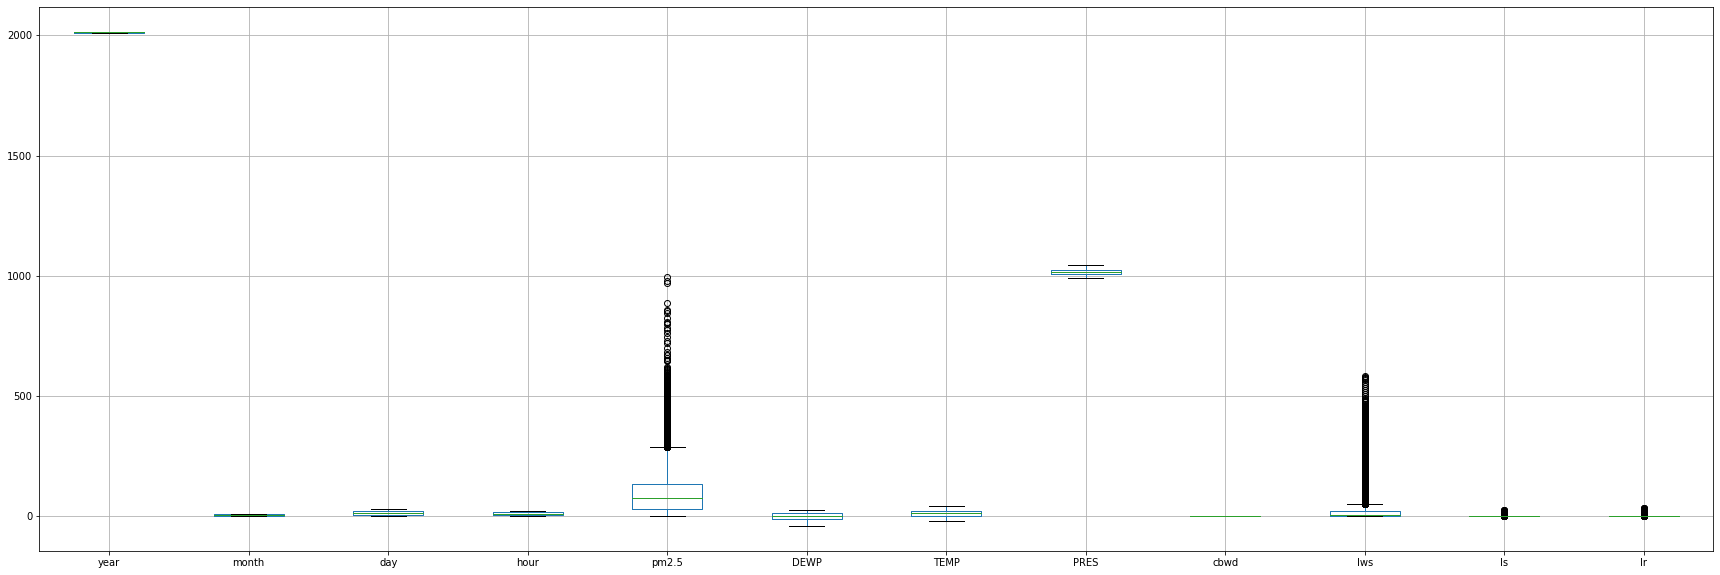

In [ ]:
df.boxplot(figsize = (30, 10))

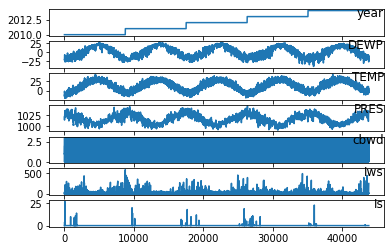

In [ ]:
cols = [0, 4, 5, 6, 7, 8, 9]
i = 1
# plotting each column
plt.figure()
for group in cols:
	plt.subplot(len(cols), 1, i)
	plt.plot(X[:, group])
	plt.title(df.columns[group], y = 0.5, loc='right')
	i += 1
plt.show()


In [ ]:
# Start preprocessing
df = df.drop(columns=['No'])
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
from sklearn import preprocessing

In [ ]:
# Label encoding
encoder = preprocessing.LabelEncoder()
df['cbwd'] = encoder.fit_transform(df['cbwd'])
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,1,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,1,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,1,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,1,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,1,12.97,0,0


In [ ]:
# df["pm2.5"] = df.groupby("month").transform(lambda x: x.fillna(x.mean()))
df['pm2.5'] = df['pm2.5'].fillna(df.groupby(['month', 'year'])['pm2.5'].transform('mean'))

In [ ]:
# Getting the values of y and X separately
y = df.month.values
del df["month"]
X = df.values.astype(np.float)
# end preprocessing

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(X)

In [ ]:
# Splitting into training, validation and test sets
seed(0)
indices = list(range(X.shape[0]))
training_instances = int(0.7*X.shape[0])
validation_instances = int(0.15 * X.shape[0])
np.random.shuffle(indices)
train = indices[:training_instances]
validation = indices[training_instances:training_instances + validation_instances + 1]
test = indices[training_instances + validation_instances + 1:]
# print(len(train)/len(X))

In [ ]:
X_train, X_validation, X_test = X[train], X[validation], X[test]
y_train, y_validation, y_test = y[train], y[validation], y[test]

In [ ]:
# Model starting
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def accuracy(y_pred, y_test):
    # calculate accuracy
    acc = 0
    for i in range(len(y_test)):
        if (y_test[i] == y_pred[i]):
            acc += 1
    return acc/len(y_test)


In [ ]:
# 1.(a)
# Gini Index
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_pred, y_test)

0.8153331305141467

In [ ]:
# 1.(a)
# entropy
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_pred, y_test)

0.8244599939154243

In [ ]:
# The one giving better acc : Entropy
acc_gini = 0
acc_entropy = 0
range_ = 20

for i in range(range_):
    clf = tree.DecisionTreeClassifier(criterion='gini')
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_gini += accuracy(y_pred, y_test)


for i in range(range_):
    clf = tree.DecisionTreeClassifier(criterion='entropy')
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_entropy += accuracy(y_pred, y_test)


meanAccGini = acc_gini/range_
meanAccEntropy = acc_entropy/range_

if (meanAccGini > meanAccEntropy):
    print("The classifier giving better results is Gini Index with mean accuracy = ", meanAccGini)
else:
    print("The classifier giving better results is Entropy with mean accuracy = ", meanAccEntropy)

The classifier giving better results is Entropy with mean accuracy =  0.8253726802555524


In [ ]:
# 1.b// Using Entropy
maxDepths = [2, 4, 8, 10, 15, 30, 35, 40, 45]
depthAccTrain = []
depthAccTest = []

for i in range(len(maxDepths)):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=maxDepths[i])
    clf = clf.fit(X_train, y_train)
    yPredTrain = clf.predict(X_train)
    depthAccTrain.append(accuracy(yPredTrain, y_train))
    yPredTest = clf.predict(X_test)
    depthAccTest.append(accuracy(yPredTest, y_test))





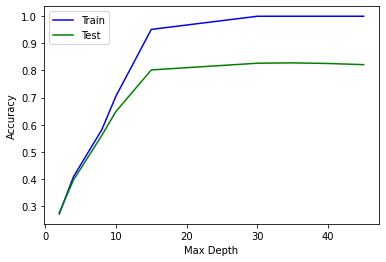

In [ ]:
# plot
plt.plot(maxDepths, depthAccTrain, color='blue', label = 'Train')
plt.plot(maxDepths, depthAccTest, color='green', label = 'Test')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")
plt.show()

In [ ]:
print("The actual depth of classifier is:", clf.get_depth())

The actual depth of classifier is: 26


In [ ]:
from scipy import stats

def jointAccuracy(accJoint_, y_test):
    yPredJoint = stats.mode(accJoint_)
    yPredJoint = yPredJoint[0]
    return accuracy(yPredJoint[0], y_test)


In [ ]:
# 1.c
noOfStumps = 100
maxDepthC = 3
trainPer = 0.5
accJoint = [[0]*noOfStumps]*len(y_test)
accJoint_ = []

for i in range(noOfStumps):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=maxDepthC)
    indices = list(range(X_train.shape[0]))
    trainStump = int(trainPer*X_train.shape[0])
    np.random.shuffle(indices)
    train_ = indices[:trainStump]
    XTrainStump = X_train[train_]
    YTrainStump = y_train[train_]
    clf = clf.fit(XTrainStump, YTrainStump)
    yPredTest = clf.predict(X_test)
    # print(accuracy(yPredTest, y_test))
    accJoint_.append(yPredTest)




In [ ]:
# accJoint = np.concatenate(accJoint_)
print("The accuracy of ensemble method is: ", jointAccuracy(accJoint_, y_test))

The accuracy of ensemble method is:  0.3576209309400669


In [ ]:
# 1.c
noOfStumps = np.linspace(10, 250, 9, dtype=np.int64)
maxDepthsD = [4, 8, 10, 15, 20, 30] 
trainPer = 0.5
accJointDepthsTrain = []
accJointDepthsValidation = []
accJointDepthsTest = []

for depth in maxDepthsD:
    accJointStumpsTrain = []
    accJointStumpsValidation = []
    accJointStumpsTest = []
    
    for stumps in noOfStumps:
        accJointDTrain = []
        accJointDValidation = []
        accJointDTest = []

        for tree_ in range(stumps):
            clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
            indices = list(range(X_train.shape[0]))
            trainStump = int(trainPer*X_train.shape[0])
            np.random.shuffle(indices)
            train_ = indices[:trainStump]
            XTrainStump = X_train[train_]
            YTrainStump = y_train[train_]
            clf = clf.fit(XTrainStump, YTrainStump)
            
            
            yPredTrain = clf.predict(X_train)
            accJointDTrain.append(yPredTrain)

            yPredValidation = clf.predict(X_validation)
            accJointDValidation.append(yPredValidation)

            yPredTest = clf.predict(X_test)
            accJointDTest.append(yPredTest)
        

        accJointStumpsTrain.append(jointAccuracy(accJointDTrain, y_train))
        accJointStumpsValidation.append(jointAccuracy(accJointDValidation, y_validation))
        accJointStumpsTest.append(jointAccuracy(accJointDTest, y_test))
    
    accJointDepthsTrain.append(accJointStumpsTrain)
    accJointDepthsValidation.append(accJointStumpsValidation)
    accJointDepthsTest.append(accJointStumpsTest)
        
        





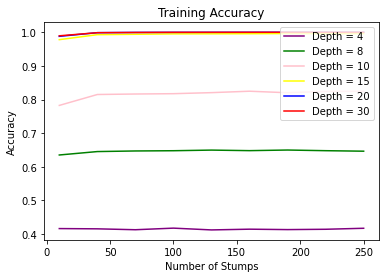

In [ ]:
colors = ['purple', 'green', 'pink', 'yellow','blue', 'red']

# Training accuracy
for i in range(len(maxDepthsD)):
    plt.plot(noOfStumps, accJointDepthsTrain[i], color=colors[i], label = "Depth = " + str(maxDepthsD[i]))

plt.title("Training Accuracy")
plt.xlabel("Number of Stumps")
plt.ylabel("Accuracy")
plt.legend(loc ="upper right")
plt.show()

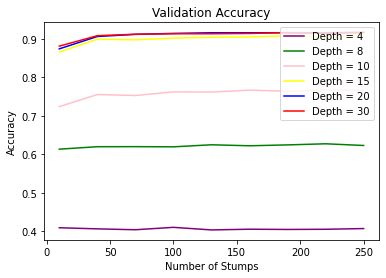

In [ ]:
for i in range(len(maxDepthsD)):
    plt.plot(noOfStumps, accJointDepthsValidation[i], color=colors[i], label = "Depth = " + str(maxDepthsD[i]))

plt.title("Validation Accuracy")
plt.xlabel("Number of Stumps")
plt.ylabel("Accuracy")
plt.legend(loc ="upper right")
plt.show()

In [ ]:
print(noOfStumps)

[ 10  40  70 100 130 160 190 220 250 100]


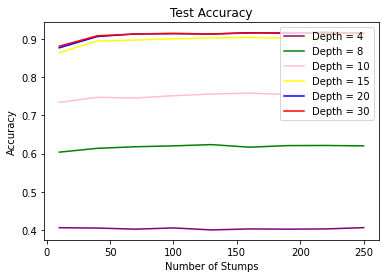

In [ ]:
for i in range(len(maxDepthsD)):
    plt.plot(noOfStumps, accJointDepthsTest[i], color=colors[i], label = "Depth = " + str(maxDepthsD[i]))

plt.title("Test Accuracy")
plt.xlabel("Number of Stumps")
plt.ylabel("Accuracy")
plt.legend(loc ="upper right")
plt.show()

In [ ]:
# Final Prediction
# 1.c
noOfStumps = 70
maxDepthC = 30
trainPer = 0.5
accJoint = [[0]*noOfStumps]*len(y_test)
accJoint_ = []

for i in range(noOfStumps):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=maxDepthC)
    indices = list(range(X_train.shape[0]))
    trainStump = int(trainPer*X_train.shape[0])
    np.random.shuffle(indices)
    train_ = indices[:trainStump]
    XTrainStump = X_train[train_]
    YTrainStump = y_train[train_]
    clf = clf.fit(XTrainStump, YTrainStump)
    yPredTest = clf.predict(X_test)
    accJoint_.append(yPredTest)


print("The accuracy of ensemble method is: ", jointAccuracy(accJoint_, y_test))

The accuracy of ensemble method is:  0.9122299969577122


In [ ]:
# 1.e
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=100), n_estimators=100)
clf.fit(X_train, y_train)
yPredAda = clf.predict(X_test)
accuracy(yPredAda, y_test)

0.8317614846364466

In [ ]:
estimators = [4, 8, 10, 15, 20, 30] 
adaAcc = []
for i in estimators:
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    yPredAda = clf.predict(X_test)
    adaAcc.append(accuracy(yPredAda, y_test))


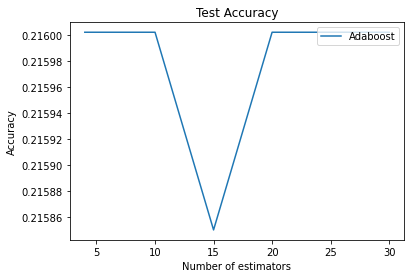

In [ ]:
plt.plot(estimators, adaAcc, label = "Adaboost")
plt.title("Accuracy")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.legend(loc = "upper right")
plt.show()

In [ ]:
estimators = [2, 4, 8, 10, 15, 20, 30] 
adaAcc = []
for i in estimators:
    clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1), n_estimators=i)
    clf.fit(X_train, y_train)
    yPredAda = clf.predict(X_test)
    adaAcc.append(accuracy(yPredAda, y_test))


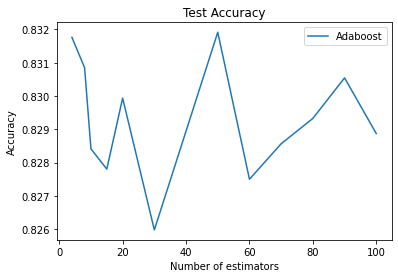

In [ ]:
plt.plot(estimators, adaAcc, label = "Adaboost")
plt.title("Accuracy")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.legend(loc = "upper right")
plt.show()

In [ ]:
# Comparison/ Left
plt.plot(estimators, adaAcc, label = "Adaboost")
plt.plot(estimators, adaAcc, label = "Random Forest")
plt.title("Accuracy")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.legend(loc = "upper right")
plt.show()
